In [41]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
pip install statsmodels

In [2]:
from scipy.interpolate import UnivariateSpline

def make_smoother(x, y, s=0.3):
    spline = UnivariateSpline(x, y, s=s)  # Параметр s регулирует степень сглаживания
    y_spline = spline(x)
    return y_spline

In [3]:
def plots(loss, u_points, title):
    x_ = np.arange(loss.shape[0])
    fig = plt.figure(figsize=(12, 6))
    fig.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.title("MAPE, %")
    # plt.plot(loss, alpha=0.5)
    plt.plot(make_smoother(x_, loss, s=1.8))
    plt.xlabel("Point")
    plt.ylabel("Loss")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.ylim((-0.1, 1.1))
    plt.title("Unpredicted points")
    # plt.plot(u_points, alpha=0.5)
    plt.plot(make_smoother(x_, u_points, s=0.2))
    plt.xlabel("Point")
    plt.ylabel("Unpredicted points proportion")
    plt.grid()
    
    plt.show()

In [39]:
def plots_2(loss1, loss2, u_points1, u_points2, title):
    x_ = np.arange(loss1.shape[0])
    fig = plt.figure(figsize=(12, 6))
    fig.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.title("MAPE, %")
    # plt.plot(loss1, alpha=0.5)
    plt.plot(make_smoother(x_, loss1, s=1.9), label="Initial")
    # plt.plot(loss2, alpha=0.5)
    plt.plot(make_smoother(x_, loss2, s=2.2), label="Final")
    plt.xlabel("Point")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.ylim((0, 1))
    plt.title("Unpredicted points")
    # plt.plot(u_points1, alpha=0.5)
    plt.plot(make_smoother(x_, u_points1, s=0.2), label="Initial")
    # plt.plot(u_points2, alpha=0.5)
    plt.plot(make_smoother(x_, u_points2, s=0.2), label="Final")
    plt.xlabel("Point")
    plt.ylabel("Unpredicted points proportion")
    plt.legend(loc="upper left")
    plt.grid()
    
    plt.show()

In [6]:
def get_data(df : pd.DataFrame, row : int):
    loss = np.array(df)[2 * row]
    u_points = np.array(df)[2 * row + 1]

    return loss, u_points

In [28]:
base_df = pd.read_csv("diff_sizes.csv", delimiter=';', header=None)

base_l, base_u = get_data(base_df, 0)

Colmogorov

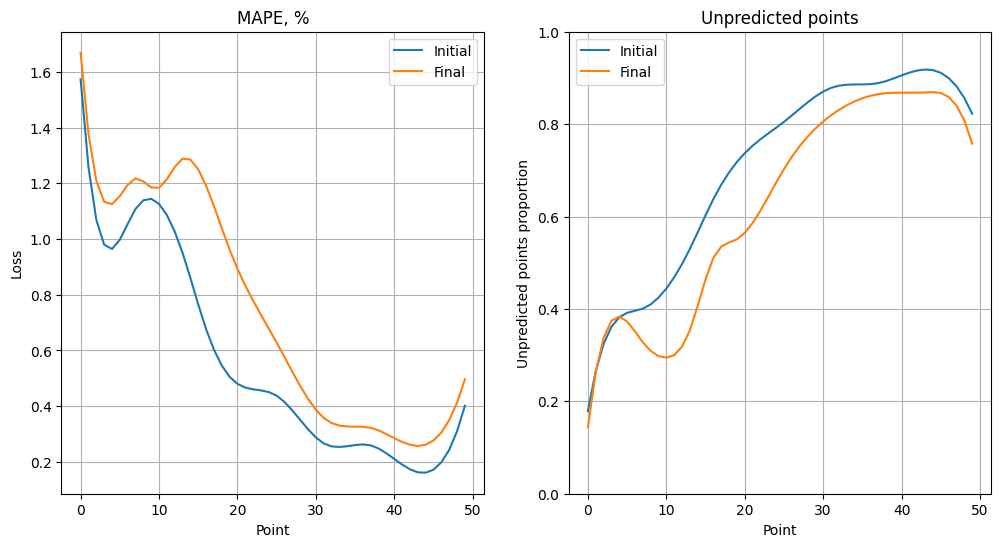

In [40]:
df = pd.read_csv("colmogorov/colmogorov1.csv", delimiter=';', header=None)
ll, uu = get_data(df, 0)
title = ""
plots_2(base_l, ll, base_u, uu, title)

DTW

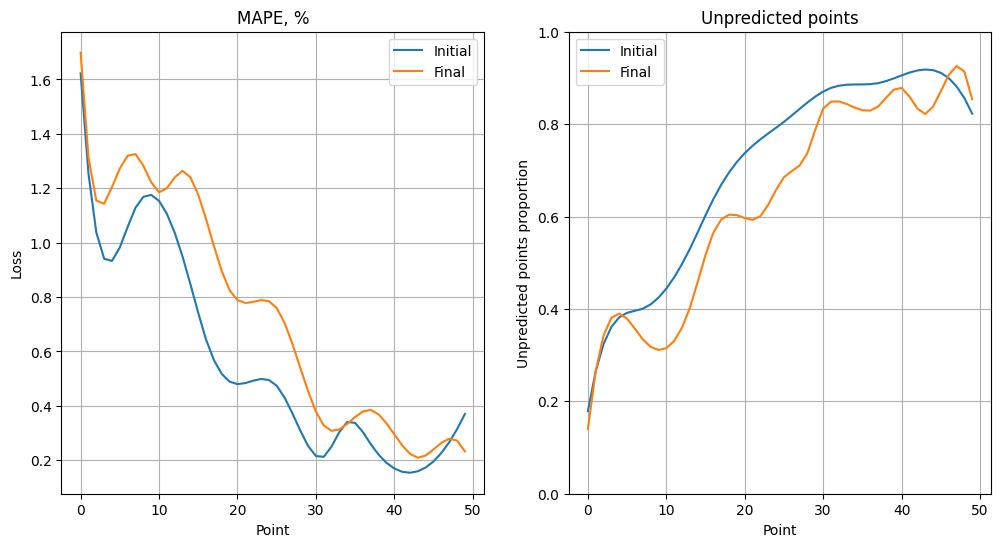

In [204]:
df = pd.read_csv("DATA/dtw.csv", delimiter=' ', header=None)
ll, uu = get_data(df, 7)
title = ""
plots_2(base_l, ll, base_u, uu, title)

Probability

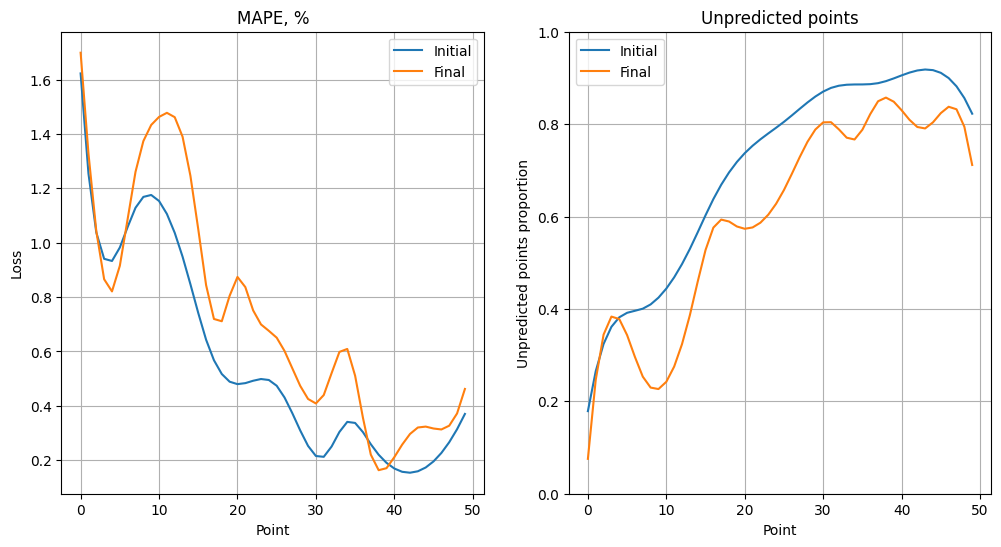

In [203]:
df = pd.read_csv("probability_metrics/norm.csv", delimiter=' ', header=None)
ll, uu = get_data(df, 13)
title = "Original series train_size=1000 / Ordinal Structures mixing train_size=5000"
plots_2(base_l, ll, base_u, uu, title="")

In [ ]:
# x_ = np.arange(50)

# plt.figure(figsize=(12, 6))
# plt.plot(make_smoother(x_, base_u, s=0.2), label="ORIGINAL")

# for i in [13]:
#     _, uu = get_data(df, i)
#     plt.plot(make_smoother(x_, uu, s=0.2), label=f"Iteration {i}")

# plt.legend(loc="center right")
# plt.show()

Metrics

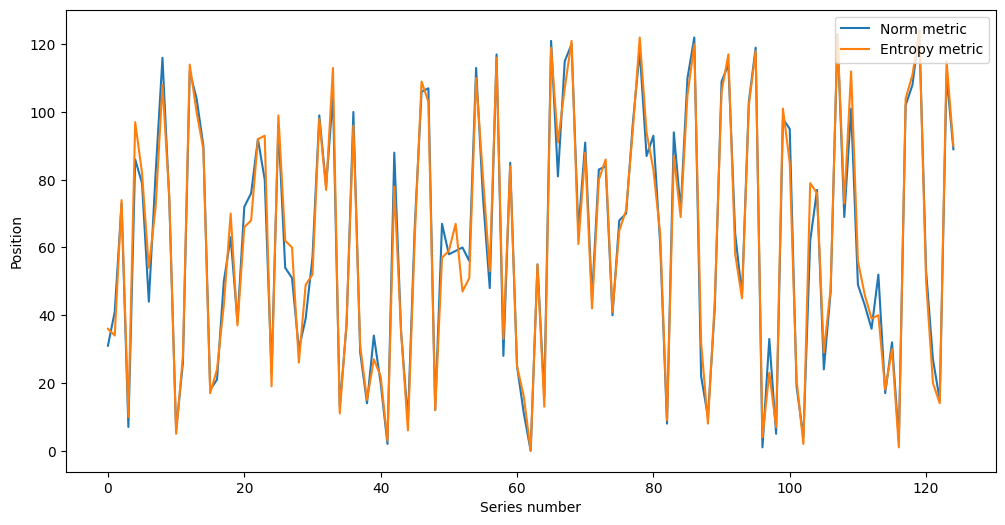

In [42]:
import csv

y1, y2 = np.zeros((125)), np.zeros((125))

with open('probability_metrics/series_positions.csv', 'r', newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=';', quotechar='|')
    for i, row in enumerate(reader):
        y1[i], y2[i], _, _ = list(map(int, row[3:]))

plt.figure(figsize=(12, 6))
plt.plot(y1, label="Norm metric")
plt.plot(y2, label="Entropy metric")
plt.xlabel("Series number")
plt.ylabel("Position")
plt.legend(loc="upper right")
plt.show()

In [19]:
def plots_2(loss1, loss2, u_points1, u_points2, title):
    x_ = np.arange(loss1.shape[0])
    fig = plt.figure(figsize=(12, 6))
    fig.suptitle(title)

    plt.subplot(1, 2, 1)
    plt.title("MAPE, %")
    # plt.plot(loss1, alpha=0.5)
    plt.plot(make_smoother(x_, loss1, s=8), label="Initial")
    # plt.plot(loss2, alpha=0.5)
    plt.plot(make_smoother(x_, loss2, s=2), label="Final")
    plt.xlabel("Point")
    plt.ylabel("Loss")
    plt.legend(loc="upper right")
    plt.grid()

    plt.subplot(1, 2, 2)
    plt.ylim((0, 1))
    plt.title("Unpredicted points")
    # plt.plot(u_points1, alpha=0.5)
    plt.plot(make_smoother(x_, u_points1, s=0.1), label="Initial")
    # plt.plot(u_points2, alpha=0.5)
    plt.plot(make_smoother(x_, u_points2, s=0.1), label="Final")
    plt.xlabel("Point")
    plt.ylabel("Unpredicted points proportion")
    plt.legend(loc="upper left")
    plt.grid()
    
    plt.show()

In [21]:
df = pd.read_csv("electricity consumption/consumption.csv", delimiter=';', header=None)
base_l, base_u = get_data(df, 0)

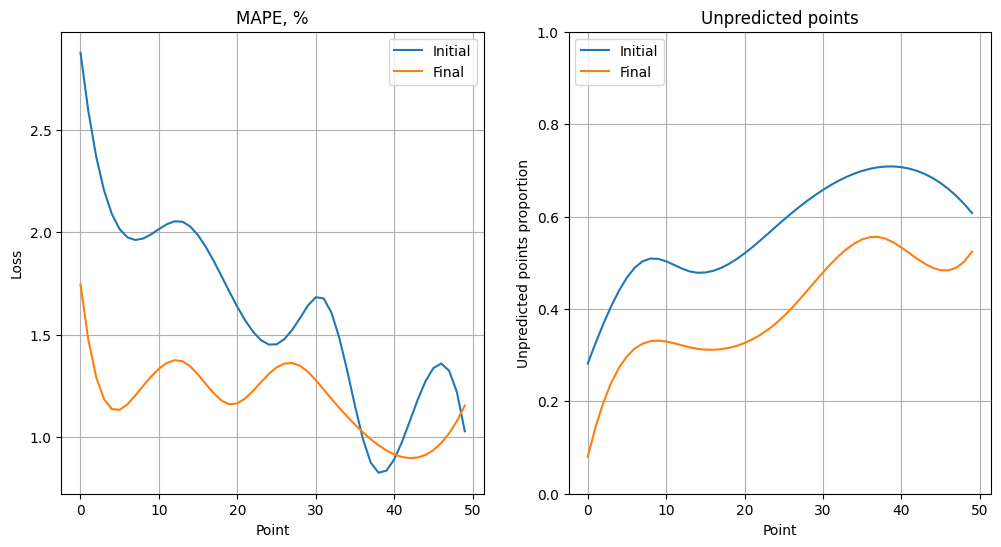

In [27]:
df = pd.read_csv("electricity consumption/consumption_w_norm.csv", delimiter=';', header=None)
ll, uu = get_data(df, 5)
plots_2(base_l, ll, base_u, uu, "")

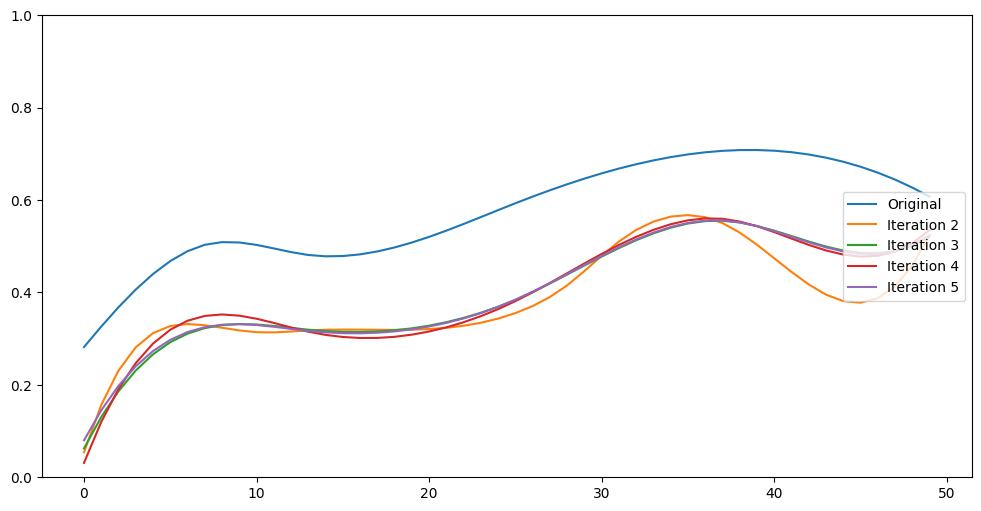

In [12]:
df = pd.read_csv("electricity consumption/consumption_w_norm.csv", delimiter=';', header=None)
x_ = np.arange(50)

plt.figure(figsize=(12, 6))
plt.ylim((0, 1))
plt.plot(make_smoother(x_, base_u, s=0.1), label="Original")

for i in [2, 3, 4, 5]:
    _, uu = get_data(df, i)
    plt.plot(make_smoother(x_, uu, s=0.1), label=f"Iteration {i}")

plt.legend(loc="center right")
plt.show()